In [28]:
import pandas as pd
import numpy as np

## Predicting sat/unsat without undersampling

In [29]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/Results-MIPVerify_SDPdMLPa.xlsx')

In [30]:
df = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_07.csv')
df

,n_vars,n_constr,n_nzcnt,nq_vars,nq_constr,nq_nzcnt,lp_avg,lp_l2_avg,lp_linf,lp_objval,...,impliedBoundCuts,flowCuts,mixedIntegerRoundingCuts,gomoryFractionalCuts,time_relax,time_VCG0,time_VCG1,time_VCG2,cplex_prob_time,INSTANCE_NAME
0,3005.0,4440.0,532558.0,0.0,0.0,0.0,0.110512,0.191534,0.497890,0.0,...,0.0,0.0,9.0,4.0,2.05000,0.000000,0.200000,0.183333,24.3167,mip_1.txt
1,2971.0,4372.0,505477.0,0.0,0.0,0.0,0.134393,0.221089,0.499550,0.0,...,0.0,0.0,20.0,10.0,2.16667,0.000000,0.216667,0.183333,25.0000,mip_10.txt
2,2967.0,4364.0,502291.0,0.0,0.0,0.0,0.106764,0.190398,0.498555,0.0,...,0.0,0.0,21.0,10.0,2.00000,0.000000,0.183333,0.183333,22.7500,mip_100.txt
3,3011.0,4452.0,537337.0,0.0,0.0,0.0,0.230292,0.322005,0.499855,0.0,...,0.0,0.0,14.0,7.0,3.36667,0.016667,0.200000,0.200000,23.4500,mip_1000.txt
4,2897.0,4224.0,446536.0,0.0,0.0,0.0,0.133350,0.217471,0.498412,0.0,...,0.0,0.0,95.0,47.0,2.06667,0.016667,0.183333,0.166667,23.5333,mip_10000.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2943.0,4316.0,483175.0,0.0,0.0,0.0,0.125741,0.204121,0.499159,0.0,...,0.0,0.0,25.0,12.0,1.26667,0.000000,0.166667,0.183333,23.8000,mip_9995.txt
9996,2843.0,4116.0,403525.0,0.0,0.0,0.0,0.129329,0.219710,0.499019,0.0,...,0.0,0.0,21.0,11.0,1.58333,0.016667,0.150000,0.150000,26.8500,mip_9996.txt
9997,2947.0,4324.0,486361.0,0.0,0.0,0.0,0.161295,0.257694,0.499142,0.0,...,0.0,0.0,11.0,5.0,3.23333,0.000000,0.183333,0.166667,22.3167,mip_9997.txt
9998,2933.0,4296.0,475210.0,0.0,0.0,0.0,0.125582,0.210217,0.499040,0.0,...,0.0,0.0,6.0,3.0,1.88333,0.016667,0.183333,0.166667,22.4167,mip_9998.txt


In [3]:
df = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_07.csv')
df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,num_i_variables,num_c_variables,ratio_i_variables,ratio_c_variables,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,3005.0,4440.0,532558.0,0.110512,0.191534,0.49789,330.0,2675.0,0.109817,0.890183,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,2971.0,4372.0,505477.0,0.134393,0.221089,0.49955,313.0,2658.0,0.105352,0.894648,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,2967.0,4364.0,502291.0,0.106764,0.190398,0.498555,311.0,2656.0,0.10482,0.89518,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,3011.0,4452.0,537337.0,0.230292,0.322005,0.499855,333.0,2678.0,0.110594,0.889406,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,2897.0,4224.0,446536.0,0.13335,0.217471,0.498412,276.0,2621.0,0.095271,0.904729,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2943.0,4316.0,483175.0,0.125741,0.204121,0.499159,299.0,2644.0,0.101597,0.898403,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,2843.0,4116.0,403525.0,0.129329,0.21971,0.499019,249.0,2594.0,0.087583,0.912416,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,2947.0,4324.0,486361.0,0.161295,0.257694,0.499142,301.0,2646.0,0.102138,0.897862,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,2933.0,4296.0,475210.0,0.125582,0.210217,0.49904,294.0,2639.0,0.100239,0.899761,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


In [4]:
df[df['SolveStatus_conf3'] == 'Optimal'] 
# Count userlimit config default == 2658
# Count InfeasibleOrUnbounded config default == 6505
# Count Infeasible config default == 0
# Count Optimal config default == 837

# Count userlimit config1 == 2086
# Count InfeasibleOrUnbounded config default == 7209
# Count Infeasible config default == 0
# Count Optimal config1 == 705

# Count userlimit config2 == 1848
# Count InfeasibleOrUnbounded config2 == 0
# Count Infeasible config2 == 7512
# Count Optimal config2 == 640

# Count userlimit config3 == 1650
# Count InfeasibleOrUnbounded config3 == 0
# Count Infeasible config3 == 7502
# Count Optimal config3 == 848

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,num_i_variables,num_c_variables,ratio_i_variables,ratio_c_variables,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
18,2991.0,4412.0,521407.0,0.144001,0.227789,0.498227,323.0,2668.0,0.107991,0.892009,...,17.055727,Optimal,54.060915,Optimal,5.729277,Optimal,5.120958,Optimal,5.120958,SolveTime_conf3
20,3069.0,4568.0,583534.0,0.239232,0.325689,0.499032,362.0,2707.0,0.117954,0.882046,...,9.31577,Optimal,555.680575,Optimal,1.635875,Optimal,1.373719,Optimal,1.373719,SolveTime_conf3
40,2933.0,4296.0,475210.0,0.131391,0.218584,0.498926,294.0,2639.0,0.100239,0.899761,...,809.615652,Optimal,1510.567759,Optimal,2281.130133,Optimal,2575.033846,Optimal,809.615652,SolveTime_default
48,3103.0,4636.0,610615.0,0.143178,0.229622,0.49917,379.0,2724.0,0.12214,0.87786,...,12.581302,Optimal,39.910459,Optimal,2.963353,Optimal,2.486743,Optimal,2.486743,SolveTime_conf3
60,3109.0,4648.0,615394.0,0.137727,0.21957,0.499082,382.0,2727.0,0.122869,0.877131,...,10.91821,Optimal,829.304197,Optimal,3.181931,Optimal,3.415408,Optimal,3.181931,SolveTime_conf2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,2981.0,4392.0,513442.0,0.145761,0.231009,0.499916,318.0,2663.0,0.106676,0.893324,...,5853.899397,Optimal,9600.032093,UserLimit,9600.101891,UserLimit,3355.84322,Optimal,3355.84322,SolveTime_conf3
9940,2951.0,4332.0,489547.0,0.14552,0.234573,0.49826,303.0,2648.0,0.102677,0.897323,...,3.69777,Optimal,33.082093,Optimal,1.138001,Optimal,0.925751,Optimal,0.925751,SolveTime_conf3
9969,2991.0,4412.0,521407.0,0.143896,0.230613,0.498208,323.0,2668.0,0.107991,0.892009,...,2.224831,Optimal,26.088385,Optimal,1.529443,Optimal,1.018848,Optimal,1.018848,SolveTime_conf3
9974,2987.0,4404.0,518221.0,0.155469,0.23543,0.497941,321.0,2666.0,0.107466,0.892534,...,2.24775,Optimal,623.025374,Optimal,1.507535,Optimal,0.954469,Optimal,0.954469,SolveTime_conf3


InfeasibleOrUnbounded    3252
UserLimit                1329
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
UserLimit                1329
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.7322
[[3075  178    0]
 [ 807  514    8]
 [ 218  128   72]]


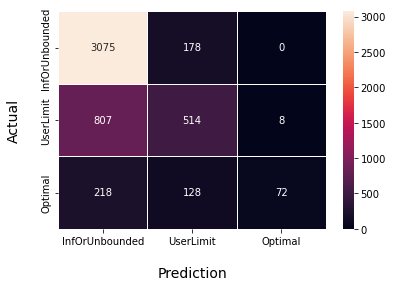

,0
lp_l2_avg,0.039073
lp_avg,0.033841
vcg_var_weight1_varcoef,0.030392
rhs_c_0_varcoef,0.029102
vcg_var_weight1_avg,0.028227
rhs_c_1_avg,0.028141
rhs_c_0_avg,0.028133
cplex_prob_time,0.026678
vcg_var_weight2_varcoef,0.026116
vcg_constr_weight1_avg,0.025882


In [5]:
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

InfeasibleOrUnbounded    6505
Optimal                   837
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3252
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.91500953418687
f1 score: 0.4526315789473684
[[3230   23]
 [ 289  129]]


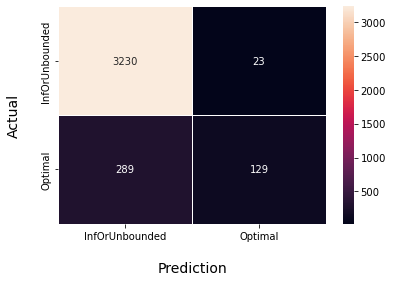

,0
mipgap,0.062917
lp_l2_avg,0.057717
cplex_prob_time,0.053134
lp_avg,0.042815
rhs_c_0_varcoef,0.037663
vcg_var_weight1_avg,0.024701
vcg_var_weight1_varcoef,0.023162
vcg_constr_weight0_avg,0.022314
rhs_c_0_avg,0.022072
vcg_var_weight0_avg,0.021920


In [6]:
## Without UserLimit
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

In [7]:
# checking the misclassified instances
df_no_ul[df_no_ul.index.isin(testing_labels.index)]

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,num_i_variables,num_c_variables,ratio_i_variables,ratio_c_variables,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,3005.0,4440.0,532558.0,0.110512,0.191534,0.49789,330.0,2675.0,0.109817,0.890183,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
2,2967.0,4364.0,502291.0,0.106764,0.190398,0.498555,311.0,2656.0,0.10482,0.89518,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
4,2897.0,4224.0,446536.0,0.13335,0.217471,0.498412,276.0,2621.0,0.095271,0.904729,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
6,2915.0,4260.0,460873.0,0.185843,0.287949,0.49992,285.0,2630.0,0.09777,0.90223,...,97.101702,InfeasibleOrUnbounded,589.42101,InfeasibleOrUnbounded,52.083775,Infeasible,54.560538,Infeasible,52.083775,SolveTime_conf2
7,2909.0,4248.0,456094.0,0.144254,0.234949,0.498154,282.0,2627.0,0.09694,0.903059,...,963.175574,InfeasibleOrUnbounded,125.566326,InfeasibleOrUnbounded,75.395103,Infeasible,101.884567,Infeasible,75.395103,SolveTime_conf2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,2915.0,4260.0,460873.0,0.127025,0.204955,0.484683,285.0,2630.0,0.09777,0.90223,...,93.148071,InfeasibleOrUnbounded,989.179514,InfeasibleOrUnbounded,27.565806,Infeasible,2870.818679,Infeasible,27.565806,SolveTime_conf2
9983,2897.0,4224.0,446536.0,0.140295,0.227434,0.49983,276.0,2621.0,0.095271,0.904729,...,19.486989,InfeasibleOrUnbounded,819.904871,InfeasibleOrUnbounded,28.711785,Infeasible,23.262188,Infeasible,19.486989,SolveTime_default
9988,2965.0,4360.0,500698.0,0.146304,0.232378,0.496972,310.0,2655.0,0.104553,0.895447,...,18.565732,InfeasibleOrUnbounded,77.400619,InfeasibleOrUnbounded,339.408313,Infeasible,258.366056,Infeasible,18.565732,SolveTime_default
9991,2975.0,4380.0,508663.0,0.109845,0.192072,0.498091,315.0,2660.0,0.105882,0.894118,...,18.198722,InfeasibleOrUnbounded,899.18357,InfeasibleOrUnbounded,83.397538,Infeasible,39.740982,Infeasible,18.198722,SolveTime_default


In [8]:
predlist = []
labellist = []
indexlist = []
testing_index_list = testing_labels.index
new_testing_labels = testing_labels.reset_index(drop=True)

for i in range(len(preds)):
    if preds[i] == new_testing_labels[i]:
        pass
    else:
        predlist.append(preds[i])
        labellist.append(new_testing_labels[i])
        indexlist.append(testing_index_list[i])



In [9]:
temp1 = df_no_ul[['SampleNumber', 'SolveTime_default', 'SolveStatus_default', 'Config_best']]

In [10]:
temp2 = pd.DataFrame({'pred':predlist, 'label': labellist}, index=indexlist)

In [11]:
pd.merge(temp1, temp2, left_index=True, right_index=True).head(60)

,SampleNumber,SolveTime_default,SolveStatus_default,Config_best,pred,label
18,1013,17.055727,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
117,1102,241.707594,Optimal,SolveTime_default,InfeasibleOrUnbounded,Optimal
129,1113,9.243663,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
174,1154,5522.064213,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
186,1165,5601.890882,Optimal,SolveTime_default,InfeasibleOrUnbounded,Optimal
188,1167,4585.779722,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
216,1192,11.109616,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
223,1199,11.769664,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
255,1227,10.176386,Optimal,SolveTime_conf3,InfeasibleOrUnbounded,Optimal
258,123,6780.598022,InfeasibleOrUnbounded,SolveTime_conf2,Optimal,InfeasibleOrUnbounded


InfeasibleOrUnbounded    3605
UserLimit                1043
Optimal                   352
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3604
UserLimit                1043
Optimal                   353
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.7716
[[3486  118    0]
 [ 736  298    9]
 [ 200   79   74]]


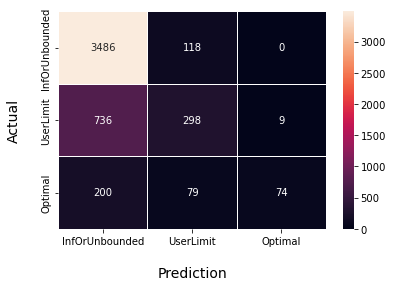

,0
lp_l2_avg,0.040552
lp_avg,0.036669
vcg_var_weight1_avg,0.032588
cplex_prob_time,0.028759
rhs_c_0_varcoef,0.027249
rhs_c_0_avg,0.025338
mipgap,0.025074
vcg_var_weight1_varcoef,0.024533
rhs_c_1_varcoef,0.024090
rhs_c_1_avg,0.023964


In [12]:
#### SOLVER STATUS conf1
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

InfeasibleOrUnbounded    7209
Optimal                   705
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3604
Optimal                   353
Name: SolveStatus_conf1, dtype: int64
InfeasibleOrUnbounded    3605
Optimal                   352
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.9365681071518828
f1 score: 0.475991649269311
[[3592   13]
 [ 238  114]]


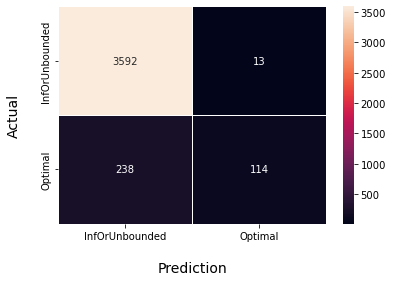

,0
mipgap,0.089524
cplex_prob_time,0.065865
lp_l2_avg,0.043240
lp_avg,0.039468
rhs_c_0_varcoef,0.028579
vcg_var_weight1_avg,0.025193
vcg_constr_weight1_avg,0.022993
vcg_var_weight0_avg,0.020614
vcg_var_weight1_varcoef,0.020556
rhs_c_1_avg,0.020510


In [13]:
## Without UserLimit
#### SOLVER STATUS conf1
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf1 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf1'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    3756
UserLimit      924
Optimal        320
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
UserLimit      924
Optimal        320
Name: SolveStatus_conf2, dtype: int64
training accuracy: 1.0
test accuracy: 0.7948
[[3671   85    0]
 [ 698  225    1]
 [ 185   57   78]]


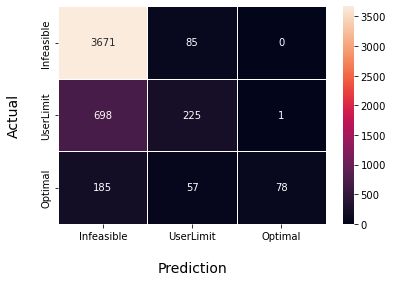

,0
lp_l2_avg,0.042474
lp_avg,0.035567
cplex_prob_time,0.031255
vcg_var_weight1_avg,0.030555
vcg_var_weight1_varcoef,0.028865
vcg_var_weight2_varcoef,0.028140
rhs_c_0_varcoef,0.027909
rhs_c_0_avg,0.027186
rhs_c_1_avg,0.023800
rhs_c_1_varcoef,0.023323


In [14]:
#### SOLVER STATUS conf2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf2']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    7512
Optimal        640
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
Optimal        320
Name: SolveStatus_conf2, dtype: int64
Infeasible    3756
Optimal        320
Name: SolveStatus_conf2, dtype: int64
training accuracy: 1.0
test accuracy: 0.9438174681059862
f1 score: 0.4662004662004662
[[3747    9]
 [ 220  100]]


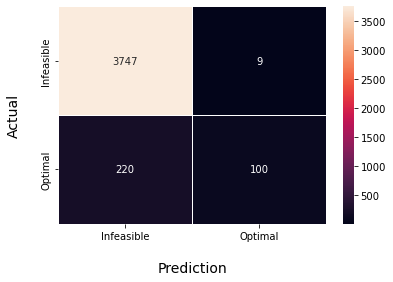

,0
mipgap,0.088274
cplex_prob_time,0.064594
lp_l2_avg,0.039458
lp_avg,0.036371
rhs_c_0_varcoef,0.026524
mixedIntegerRoundingCuts,0.023966
time_relax,0.023259
vcg_var_weight1_varcoef,0.021875
clique_table,0.021650
vcg_constr_weight0_avg,0.021219


In [15]:
## Without UserLimit
#### SOLVER STATUS conf2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf2 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf2'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf2']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    3751
UserLimit      825
Optimal        424
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
UserLimit      825
Optimal        424
Name: SolveStatus_conf3, dtype: int64
training accuracy: 1.0
test accuracy: 0.7852
[[3671   78    2]
 [ 635  185    5]
 [ 279   75   70]]


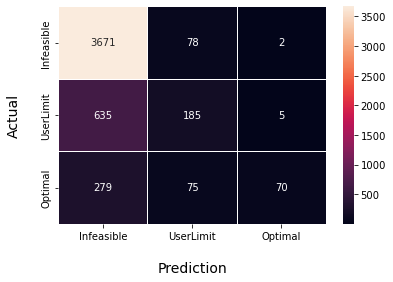

,0
lp_l2_avg,0.040078
lp_avg,0.034655
cplex_prob_time,0.031397
vcg_var_weight1_varcoef,0.030041
vcg_var_weight1_avg,0.029720
rhs_c_0_varcoef,0.029397
mipgap,0.027899
rhs_c_0_avg,0.026402
vcg_var_weight2_varcoef,0.024304
vcg_constr_weight1_avg,0.023101


In [16]:
#### SOLVER STATUS conf3
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix



X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_conf3']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

Infeasible    7502
Optimal        848
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
Optimal        424
Name: SolveStatus_conf3, dtype: int64
Infeasible    3751
Optimal        424
Name: SolveStatus_conf3, dtype: int64
training accuracy: 0.9997604790419161
test accuracy: 0.9252694610778444
f1 score: 0.4388489208633093
[[3741   10]
 [ 302  122]]


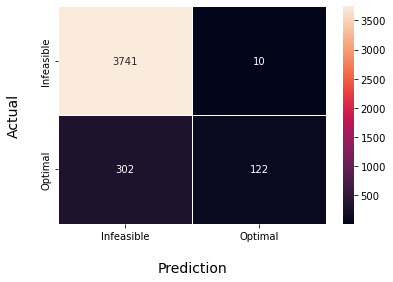

,0
mipgap,0.072981
cplex_prob_time,0.056852
lp_l2_avg,0.047993
rhs_c_0_varcoef,0.039563
lp_avg,0.037909
vcg_constr_weight0_avg,0.023018
vcg_var_weight0_avg,0.022883
time_relax,0.021935
rhs_c_1_avg,0.021851
rhs_c_2_avg,0.021478


In [17]:
## Without UserLimit
#### SOLVER STATUS conf3
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf3 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf3'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_conf3']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Infeasible', 'Optimal'])
ax.yaxis.set_ticklabels(['Infeasible', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10)

## Predicting timeout for multiple userlimits

In [18]:
def set_timeout(x, t):
    if x >= t:
        return 9600
    else:
        return x


In [19]:
def timeout_dummy(x):
    if x >=9600:
        return 1
    else:
        return 0

df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: SolveTime_best, Length: 10000, dtype: int64

In [20]:
df = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_07.csv')
df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,num_i_variables,num_c_variables,ratio_i_variables,ratio_c_variables,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,3005.0,4440.0,532558.0,0.110512,0.191534,0.49789,330.0,2675.0,0.109817,0.890183,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,2971.0,4372.0,505477.0,0.134393,0.221089,0.49955,313.0,2658.0,0.105352,0.894648,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,2967.0,4364.0,502291.0,0.106764,0.190398,0.498555,311.0,2656.0,0.10482,0.89518,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,3011.0,4452.0,537337.0,0.230292,0.322005,0.499855,333.0,2678.0,0.110594,0.889406,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,2897.0,4224.0,446536.0,0.13335,0.217471,0.498412,276.0,2621.0,0.095271,0.904729,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2943.0,4316.0,483175.0,0.125741,0.204121,0.499159,299.0,2644.0,0.101597,0.898403,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,2843.0,4116.0,403525.0,0.129329,0.21971,0.499019,249.0,2594.0,0.087583,0.912416,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,2947.0,4324.0,486361.0,0.161295,0.257694,0.499142,301.0,2646.0,0.102138,0.897862,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,2933.0,4296.0,475210.0,0.125582,0.210217,0.49904,294.0,2639.0,0.100239,0.899761,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


In [21]:
df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: SolveTime_best, Length: 10000, dtype: int64

In [22]:
t_list = np.arange(20, 9620, 20)

train_accuracy = []
test_accuracy = []
f1score = []
majclass = []

for t in t_list:
    df['TIMEOUT'] = df['SolveTime_default'].apply(set_timeout, t=t).apply(timeout_dummy)
    ## Classifier starts here
    X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
    y = df['TIMEOUT']
    cl0, cl1 = y.value_counts()
    training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)

    clf=RandomForestClassifier()
    clf.fit(training, training_labels)
    preds = clf.predict(testing)
    print("t:", t)
    #print("training accuracy:", clf.score(training, training_labels))
    #print("test accuracy:", clf.score(testing, testing_labels))
    #print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))
    #print('------')

    train_accuracy.append(clf.score(training, training_labels))
    test_accuracy.append(clf.score(testing, testing_labels))
    f1score.append(f1_score(y_true=testing_labels, y_pred=preds))
    majclass.append(cl1/10000)


t: 20
t: 40
t: 60
t: 80
t: 100
t: 120
t: 140
t: 160
t: 180
t: 200
t: 220
t: 240
t: 260
t: 280
t: 300
t: 320
t: 340
t: 360
t: 380
t: 400
t: 420
t: 440
t: 460
t: 480
t: 500
t: 520
t: 540
t: 560
t: 580
t: 600
t: 620
t: 640
t: 660
t: 680
t: 700
t: 720
t: 740
t: 760
t: 780
t: 800
t: 820
t: 840
t: 860
t: 880
t: 900
t: 920
t: 940
t: 960
t: 980
t: 1000
t: 1020
t: 1040
t: 1060
t: 1080
t: 1100
t: 1120
t: 1140
t: 1160
t: 1180
t: 1200
t: 1220
t: 1240
t: 1260
t: 1280
t: 1300
t: 1320
t: 1340
t: 1360
t: 1380
t: 1400
t: 1420
t: 1440
t: 1460
t: 1480
t: 1500
t: 1520
t: 1540
t: 1560
t: 1580
t: 1600
t: 1620
t: 1640
t: 1660
t: 1680
t: 1700
t: 1720
t: 1740
t: 1760
t: 1780
t: 1800
t: 1820
t: 1840
t: 1860
t: 1880
t: 1900
t: 1920
t: 1940
t: 1960
t: 1980
t: 2000
t: 2020
t: 2040
t: 2060
t: 2080
t: 2100
t: 2120
t: 2140
t: 2160
t: 2180
t: 2200
t: 2220
t: 2240
t: 2260
t: 2280
t: 2300
t: 2320
t: 2340
t: 2360
t: 2380
t: 2400
t: 2420
t: 2440
t: 2460
t: 2480
t: 2500
t: 2520
t: 2540
t: 2560
t: 2580
t: 2600
t: 2620
t: 26

In [24]:
import matplotlib.pyplot as plt
minclass = [1 - x for x in majclass]
print(minclass)
print(majclass)


[0.9091, 0.8431, 0.7472, 0.6542, 0.5964, 0.5484, 0.5162, 0.5025, 0.5091, 0.515, 0.5207999999999999, 0.5246999999999999, 0.5284, 0.5315, 0.5349999999999999, 0.5375, 0.5405, 0.5428, 0.5453, 0.5469999999999999, 0.5485, 0.5512, 0.5533, 0.5552, 0.5570999999999999, 0.5586, 0.5605, 0.5621, 0.5639000000000001, 0.5656, 0.5668, 0.5683, 0.5692999999999999, 0.5710999999999999, 0.5727, 0.5746, 0.5762, 0.577, 0.5775, 0.5783, 0.5800000000000001, 0.5808, 0.5820000000000001, 0.5824, 0.5833999999999999, 0.5847, 0.5858, 0.5867, 0.5875, 0.5884, 0.5893999999999999, 0.5904, 0.5908, 0.5916, 0.593, 0.5937, 0.5944, 0.5953999999999999, 0.5965, 0.5973999999999999, 0.5981000000000001, 0.5987, 0.5991, 0.6002000000000001, 0.6013, 0.6014999999999999, 0.6025, 0.6033, 0.604, 0.6046, 0.6057, 0.6061000000000001, 0.6064, 0.607, 0.6077, 0.6087, 0.6092, 0.61, 0.6106, 0.6115999999999999, 0.6121, 0.6126, 0.6134999999999999, 0.6141, 0.6147, 0.6154999999999999, 0.6161, 0.6164000000000001, 0.6174999999999999, 0.6178, 0.6185, 0.

[0.0909, 0.1569, 0.2528, 0.3458, 0.4036, 0.4516, 0.4838, 0.5025, 0.5091, 0.515, 0.5207999999999999, 0.5246999999999999, 0.5284, 0.5315, 0.5349999999999999, 0.5375, 0.5405, 0.5428, 0.5453, 0.5469999999999999, 0.5485, 0.5512, 0.5533, 0.5552, 0.5570999999999999, 0.5586, 0.5605, 0.5621, 0.5639000000000001, 0.5656, 0.5668, 0.5683, 0.5692999999999999, 0.5710999999999999, 0.5727, 0.5746, 0.5762, 0.577, 0.5775, 0.5783, 0.5800000000000001, 0.5808, 0.5820000000000001, 0.5824, 0.5833999999999999, 0.5847, 0.5858, 0.5867, 0.5875, 0.5884, 0.5893999999999999, 0.5904, 0.5908, 0.5916, 0.593, 0.5937, 0.5944, 0.5953999999999999, 0.5965, 0.5973999999999999, 0.5981000000000001, 0.5987, 0.5991, 0.6002000000000001, 0.6013, 0.6014999999999999, 0.6025, 0.6033, 0.604, 0.6046, 0.6057, 0.6061000000000001, 0.6064, 0.607, 0.6077, 0.6087, 0.6092, 0.61, 0.6106, 0.6115999999999999, 0.6121, 0.6126, 0.6134999999999999, 0.6141, 0.6147, 0.6154999999999999, 0.6161, 0.6164000000000001, 0.6174999999999999, 0.6178, 0.6185, 0.

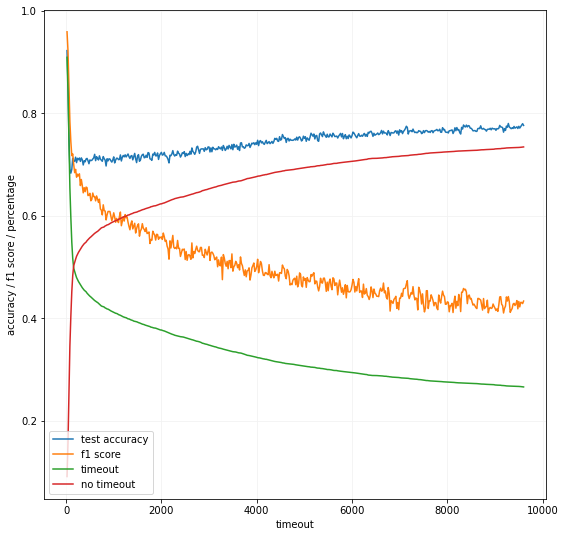

In [27]:
minclass0 = minclass[:7]
majclass0 = majclass[:7]
test_accuracy0 = test_accuracy[:7]
f1score0 = f1score[:7]
t_list0 = t_list[:7] 


minclass1 = minclass[7:]
majclass1 = majclass[7:]
test_accuracy1 = test_accuracy[7:]
f1score1 = f1score[7:]
t_list1 = t_list[7:] 

print(majclass0 + minclass1)

plt.figure(figsize=(9, 9))
plt.plot(t_list, test_accuracy, label='test accuracy')
plt.plot(t_list, f1score, label='f1 score')
plt.plot(t_list, minclass0 + majclass1, label='timeout')
plt.plot(t_list, majclass0 + minclass1, label='no timeout')


plt.xlabel("timeout")
plt.ylabel("accuracy / f1 score / percentage")
plt.grid(True, color='0.95')
plt.legend(loc='lower left')
plt.show()


## Predicting timeout with undersampling

In [24]:
df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_11.csv')
df0.rename(columns={'SampleNumber': 'INSTANCE_NAME'}, inplace=True)
df0.drop(columns='Unnamed: 0', inplace=True)
df = pd.merge(pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_08.csv'),
              pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_09.csv'), on="INSTANCE_NAME")

df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df0['INSTANCE_NAME'] = df0['INSTANCE_NAME'].astype('int')

df = pd.merge(df,df0, on="INSTANCE_NAME")

lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,UPPERBOUNDS_MEDIAN_presolve_default,UPPERBOUNDS_DENSITY_presolve_default,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,1,1437.0,330.0,1107.0,0.452455,0.0,4.014668,0.208556,0.1,0.999304,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,10,1403.0,313.0,1090.0,0.459198,0.0,4.514678,0.241107,0.1,0.996436,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,100,1399.0,311.0,1088.0,0.432643,0.0,4.140987,0.204747,0.1,0.99857,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,1000,1443.0,333.0,1110.0,0.466921,0.0,4.464831,0.221774,0.1,0.999307,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,10000,1329.0,276.0,1053.0,0.423002,0.003922,3.856785,0.220129,0.1,1.0,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1375.0,299.0,1076.0,0.441397,0.0,3.593675,0.207536,0.1,0.999273,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,9996,1275.0,249.0,1026.0,0.380774,0.0,3.215775,0.189279,0.1,0.904314,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,9997,1379.0,301.0,1078.0,0.418347,0.000135,3.886279,0.207325,0.1,1.0,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,9998,1365.0,294.0,1071.0,0.430596,0.0,4.26094,0.212202,0.1,0.999267,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


In [25]:
# do all 4 configurations timeout yes or no?
df['TIMEOUT'] = df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_best'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


0: 8504
1: 1496
0: 1496
1: 1496


In [26]:
leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']

In [27]:
testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)

In [28]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


training accuracy: 1.0
test accuracy: 0.8087958607714016
f1 score: 0.43969676085458304


[[6240 1516]
 [ 110  638]]


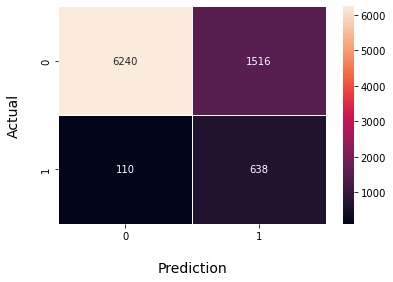

                                               0
CONSTR_MAX_presolve_default             0.058305
LH_CONSTR_MAX_presolve_default          0.044106
BOUNDRANGE_MAX_presolve_default         0.041451
LOWERBOUNDS_STD_presolve_default        0.039236
LOWERBOUNDS_MIN_presolve_default        0.026809
CONSTR_MEAN_presolve_default            0.020674
LP_dualLP_Iter/call                     0.019786
UPPERBOUNDS_MEAN_presolve_default       0.014698
BOUNDRANGE_STD_presolve_default         0.014412
CONSTR_COEFF_MIN_STD_presolve_default   0.011628
ConstraintTimings_integral_1_TotalTime  0.011390
LP_strongbranching_2_Time               0.010888
BOUNDRANGE_MEAN_presolve_default        0.010854
Separators_gomory_FoundCuts             0.010766
LP_dualLP_Iterations                    0.010263
LP_strongbranching_2_Iterations         0.009465
RootLPEstimate                          0.009219
solvingtime                             0.008988
LOWERBOUNDS_MIN_presolve_off            0.008958
TotalTime           

In [29]:
c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

## predicting timeout with training undersampling for config X

0: 7342
1: 2658
0: 2658
1: 2658
training accuracy: 1.0
test accuracy: 0.8298828657041678
f1 score: 0.6391216411441779
[[4987 1026]
 [ 223 1106]]


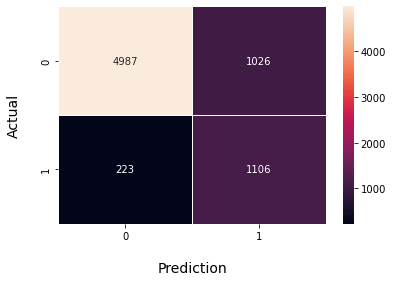

                                               0
LOWERBOUNDS_STD_presolve_default        0.040299
LH_CONSTR_MAX_presolve_default          0.038918
BOUNDRANGE_MAX_presolve_default         0.036824
LOWERBOUNDS_MIN_presolve_default        0.032405
CONSTR_MAX_presolve_default             0.023323
LP_dualLP_Iter/call                     0.019519
Presolvers_milp_ChgBounds               0.016992
CONSTR_MEAN_presolve_default            0.016894
RH_CONSTR_MEAN_presolve_default         0.016586
LP_dualLP_Iterations                    0.016082
CONSTR_COEFF_MIN_STD_presolve_default   0.012325
UPPERBOUNDS_MEAN_presolve_default       0.011840
LOWERBOUNDS_MIN_presolve_off            0.011355
RootLPEstimate                          0.010063
BOUNDRANGE_MEAN_presolve_off            0.009755
LP_strongbranching_2_Iterations         0.009125
ConstraintTimings_integral_1_TotalTime  0.008197
BranchingRules_relpscost_ExecTime       0.008181
BOUNDRANGE_STD_presolve_default         0.008009
BOUNDRANGE_STD_preso

In [30]:
# does configuration default timeout yes or no?
df['TIMEOUT'] = df['SolveTime_default'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_default'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 7914
1: 2086
0: 2086
1: 2086
training accuracy: 1.0
test accuracy: 0.8260045489006823
f1 score: 0.5654780687914168
[[5641 1230]
 [ 147  896]]


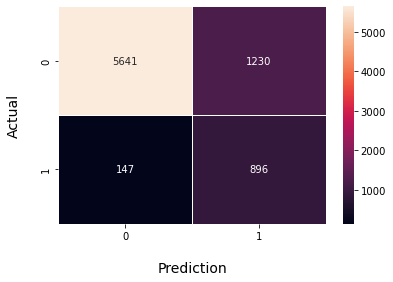

                                               0
LH_CONSTR_MAX_presolve_default          0.041711
LOWERBOUNDS_STD_presolve_default        0.036918
BOUNDRANGE_MAX_presolve_default         0.034248
CONSTR_MAX_presolve_default             0.030619
LOWERBOUNDS_MIN_presolve_default        0.028002
LP_dualLP_Iter/call                     0.022157
LP_dualLP_Iterations                    0.014928
CONSTR_MEAN_presolve_default            0.014038
Presolvers_milp_ChgBounds               0.013345
RootLPEstimate                          0.012387
BOUNDRANGE_STD_presolve_default         0.012108
LP_strongbranching_2_Iterations         0.011877
LP_strongbranching_2_Calls              0.011495
Separators_gomory_FoundCuts             0.010790
BranchingRules_relpscost_ExecTime       0.010321
CONSTR_COEFF_MIN_STD_presolve_default   0.010145
LOWERBOUNDS_MIN_presolve_off            0.009625
LP_strongbranching_2_ItLimit            0.009151
UPPERBOUNDS_MAX_presolve_default        0.008349
BOUNDRANGE_MEAN_pres

In [31]:
# does configuration 1 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf1'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf1'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 8152
1: 1848
0: 1848
1: 1848
training accuracy: 1.0
test accuracy: 0.8400392541707556
f1 score: 0.5525051475634866
[[6043 1185]
 [ 119  805]]


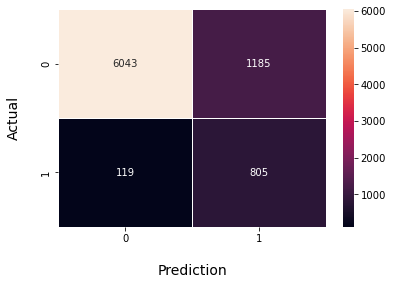

                                                    0
LH_CONSTR_MAX_presolve_default               0.041353
CONSTR_MAX_presolve_default                  0.039128
BOUNDRANGE_MAX_presolve_default              0.036919
LOWERBOUNDS_STD_presolve_default             0.027383
LOWERBOUNDS_MIN_presolve_default             0.020927
LP_dualLP_Iterations                         0.018824
CONSTR_MEAN_presolve_default                 0.018616
LP_strongbranching_2_Iterations              0.018414
LP_dualLP_Iter/call                          0.018128
BranchingRules_relpscost_ExecTime            0.016714
PrimalHeuristics_shiftandpropagate_ExecTime  0.015692
BOUNDRANGE_STD_presolve_default              0.014775
ConstraintTimings_integral_1_EnfoLP          0.013589
LP_strongbranching_2_Calls                   0.013480
LP_strongbranching_2_Time                    0.012970
LP_strongbranching_2_ItLimit                 0.012660
RootLPEstimate                               0.011160
RH_CONSTR_MEAN_presolve_defa

In [32]:
# does configuration 2 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf2'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf2'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)

0: 8350
1: 1650
0: 1650
1: 1650
training accuracy: 1.0
test accuracy: 0.8029940119760479
f1 score: 0.4712311153969785
[[5972 1553]
 [  92  733]]


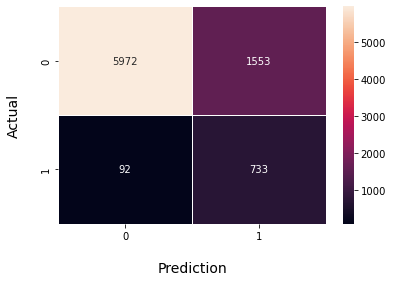

                                               0
LOWERBOUNDS_STD_presolve_default        0.035837
LH_CONSTR_MAX_presolve_default          0.032835
BOUNDRANGE_MAX_presolve_default         0.032653
CONSTR_MAX_presolve_default             0.030649
LOWERBOUNDS_MIN_presolve_default        0.025575
CONSTR_MEAN_presolve_default            0.024310
LP_dualLP_Iter/call                     0.020664
BOUNDRANGE_STD_presolve_default         0.018979
BranchingRules_relpscost_ExecTime       0.014819
CONSTR_COEFF_MIN_STD_presolve_default   0.014709
ConstraintTimings_integral_1_TotalTime  0.012860
ConstraintTimings_integral_1_EnfoLP     0.012843
RH_CONSTR_MEAN_presolve_default         0.011579
LP_strongbranching_2_ItLimit            0.011187
LP_dualLP_Iterations                    0.011138
BOUNDRANGE_MEAN_presolve_default        0.011042
LP_strongbranching_2_Time               0.010586
LP_strongbranching_2_Iterations         0.010318
BOUNDRANGE_STD_presolve_off             0.010219
Presolvers_milp_ChgB

In [33]:
# does configuration 3 timeout yes or no?
df['TIMEOUT'] = df['SolveTime_conf3'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
y = df['TIMEOUT']

## Try to downsample one of the classes since the dataset is imbalanced
class0, class1 = y.value_counts()
print("0:", class0)
print("1:", class1)

c1 = df[df['TIMEOUT'] == 1]
c0 = df[df['TIMEOUT'] == 0]
df1 = c1.sample(class1)
df0 = c0.sample(class0)

sampled0 = df0.sample(n=len(df1), random_state=1)
undersampled_df = pd.concat([df1, sampled0])
class0, class1 = undersampled_df.TIMEOUT.value_counts()
print("0:", class0)
print("1:", class1)

# do all 4 configurations timeout yes or no?
undersampled_df['TIMEOUT'] = undersampled_df['SolveTime_conf3'].apply(set_timeout, t=9600).apply(timeout_dummy)
## Classifier starts here
undersampled_X = undersampled_df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
undersampled_y = undersampled_df['TIMEOUT']
training, testing, training_labels, testing_labels = train_test_split(undersampled_X, undersampled_y, test_size = .5, random_state = 42, stratify=undersampled_y)


leftover0s = df[df['TIMEOUT'] == 0].drop(sampled0.index)
leftover0sX = leftover0s.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best', 'TIMEOUT'], axis = 1)
leftover0sy = leftover0s['TIMEOUT']


testing = pd.concat([testing,leftover0sX], axis=0)
testing_labels = pd.concat([testing_labels,leftover0sy], axis=0)


clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds)
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Confusion Matrix for Binary Classification of TIMEOUT using SCIP feature extractor, undersampling (2996) and 50/50 train/test split")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
plt.show()

print(pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)[:25])
#print("actual labels:", np.array(testing_labels))
#print("predictions:", preds)